In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [58]:
N_POP = 100
N_GEN = 50

N_DIM = 50

MUT = 0.05
CROSS = 0.5

random_shift = 2*np.random.random((N_DIM))
print random_shift

[ 1.12122412  0.07680973  0.91348858  1.39972923  1.42102642  0.15893997
  1.5276436   0.53946919  0.49213628  1.34222709  1.64428751  1.57444844
  0.11619402  1.40742398  0.19889319  1.31484911  1.43580119  1.58214973
  1.54810138  0.24432012  0.70171645  1.91325343  0.33530957  1.93042258
  1.61675694  0.29583991  1.98395538  1.15583894  0.58780085  1.43829972
  1.82573674  0.17204463  0.29197245  0.43273421  0.7183644   0.36585133
  0.06975926  1.40000837  1.53383905  0.20544723  0.70527773  1.31485385
  1.66094814  1.97730693  1.99659596  1.22605036  1.18394655  0.68586827
  0.42878094  0.71878989]


In [60]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=10):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return (pt, loss(pt))

pop = [generate_random_point() for ix in range(N_POP)]
temp = []

def crossover(p1, p2):
    n_dim = p1.shape[0]
    
    c1 = np.zeros(p1.shape)
    c2 = np.zeros(p2.shape)
    
    split = int(n_dim * CROSS)
    
    if split == 0:
        c1 = p1
        c2 = p2
    else:
        c1[:split] = p1[:split]
        c1[split:] = p2[split:]
        
        c2[:split] = p2[:split]
        c2[split:] = p1[split:]
    return c1, c2

def mutate(x):
    n_dim = x.shape[0]
    X = np.zeros(x.shape)
    
    for ix in range(n_dim):
        r = np.random.random()
        if r < MUT:
            # mutate
            X[ix] = x[ix] + (2*np.random.random() - 1)
        else:
            X[ix] = x[ix]
    return X

In [61]:
losses = []

In [62]:
for gen in range(N_GEN):
    # sort the population
    ord_pop = sorted(pop, key=lambda x: x[1])
    best = ord_pop[0]
    print best[1]#, best[0]
    losses.append(best[1])
    
    # create temp population
    temp = []
    
    while len(temp) < N_POP:
        # select p1 and p2 (parents)
        p1, p2 = random.sample(ord_pop[:N_POP/2], 2)
        
        # apply crossover to generate c1 and c2 (children)
        c1, c2 = crossover(p1[0], p2[0])        
        
        # apply mutation on c1 and c2
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        t = [p1, p2, (c1, loss(c1)), (c2, loss(c2))]
        t_sorted = sorted(t, key=lambda x: x[1])
        # save the best of p1, p2, c1, c2 in temp
        
        temp += t_sorted[:2]
        
    # replace population with temp
    pop = temp

1272.15640595
1272.15640595
1170.1274704
1128.73571828
1072.97413344
1070.22586132
1056.72470712
1040.51363117
1024.76329721
1006.34199302
992.57332119
978.313480133
970.641847627
958.111031933
938.323768127
924.904669748
916.956663219
911.185782613
897.724887171
880.182983792
871.573357229
852.045014085
839.45629964
834.415958821
827.852094905
807.394053629
804.529365195
788.350694841
780.968828892
769.788947912
757.740464727
744.518880328
735.00379323
735.00379323
713.829397292
699.101929763
690.70609251
683.680943738
673.080914012
667.164603801
654.698846982
651.444511955
643.391778499
627.548151187
623.759678944
610.441082842
606.0119642
591.453570718
584.520931814
576.681808132


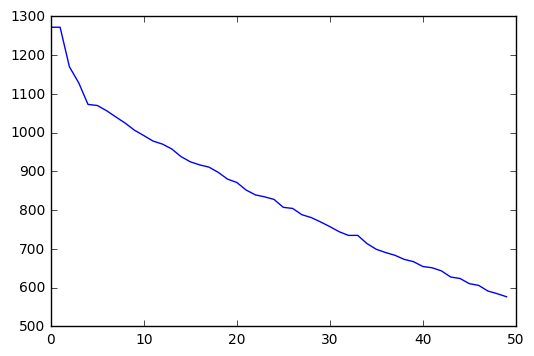

In [63]:
plt.plot(losses)